# Data loading and analysis

In [74]:
#Data handling
import pandas as pd
import seaborn as sn
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import scipy.stats as ss



#Machine learning
import sklearn
import sklearn.neural_network
import sklearn.ensemble #Random forest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Load data
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. We have data on 891 passengers out of 2224 boarding the Titanic.
2.  38.4 % survived
3.  Average age was ca. 30 years

In [8]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Flynn, Mr. James",male,347082,G6,S
freq,1,577,7,4,644


1. Every name is unique
2. 577/891 male passengers
3. Only 204 cabin values, with some cabins being duplicated i.e. shared
4. Most passengers joined in Port S
5. Most tickets sold at unique prices

In [12]:
train_corrMatrix = train_data.corr()  #Correlation between numerical values
print(test_corrMatrix)

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.026751 -0.034102  0.003818  0.043080  0.008211
Pclass         -0.026751  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age            -0.034102 -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp           0.003818  0.001087 -0.091587  1.000000  0.306895  0.171539
Parch           0.043080  0.018721 -0.061249  0.306895  1.000000  0.230046
Fare            0.008211 -0.577147  0.337932  0.171539  0.230046  1.000000


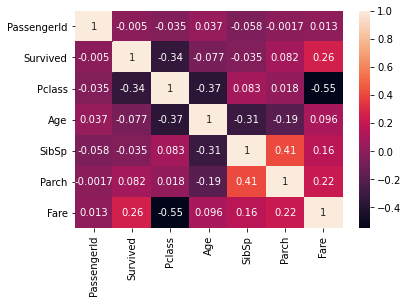

In [13]:
sn.heatmap(train_corrMatrix, annot=True) #Visualize correlation between numerical values
plt.show()

--> No correlation for ID, some correlaction with Age, Siblings, and Partners, strong correlation with fare & class

In [14]:
#Using Cramér's V presented by Shaked Zychlinski

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [15]:
corr_test = cramers_v(train_data['Survived'],train_data['Sex'])
corr_test #Strong correlation between Sex and Survivorship

0.5401999468101071

In [16]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Data analysis conclusions: 

Drop: ID, Name, Ticket, Cabin

Merge: Parch & SibSP

Complete: Age, Embarked

Convert to numerical: Embarked, Sex 

# Data editing

In [39]:
train_data_x = train_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] #Dropping less important columns
train_data_x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [40]:
test_data_x = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] #Dropping less important columns
test_data_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [41]:
mapping1 = {'male': 1, 'female': 0}
train_data_x = train_data_x.replace({'Sex':mapping1})

mapping2 = {'S':0,'C':1,'Q':2}
train_data_x = train_data_x.replace({'Embarked':mapping2})


In [42]:
mapping1 = {'male': 1, 'female': 0}
test_data_x = test_data_x.replace({'Sex':mapping1})

mapping2 = {'S':0,'C':1,'Q':2}
test_data_x = test_data_x.replace({'Embarked':mapping2})

In [43]:
print(train_data_x.head())
train_data_x.isnull().sum()

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500       0.0
1         1       1    0  38.0      1      0  71.2833       1.0
2         1       3    0  26.0      0      0   7.9250       0.0
3         1       1    0  35.0      1      0  53.1000       0.0
4         0       3    1  35.0      0      0   8.0500       0.0


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [44]:
print(test_data_x.head())
test_data_x.isnull().sum()

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         2
1       3    0  47.0      1      0   7.0000         0
2       2    1  62.0      0      0   9.6875         2
3       3    1  27.0      0      0   8.6625         0
4       3    0  22.0      1      1  12.2875         0


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

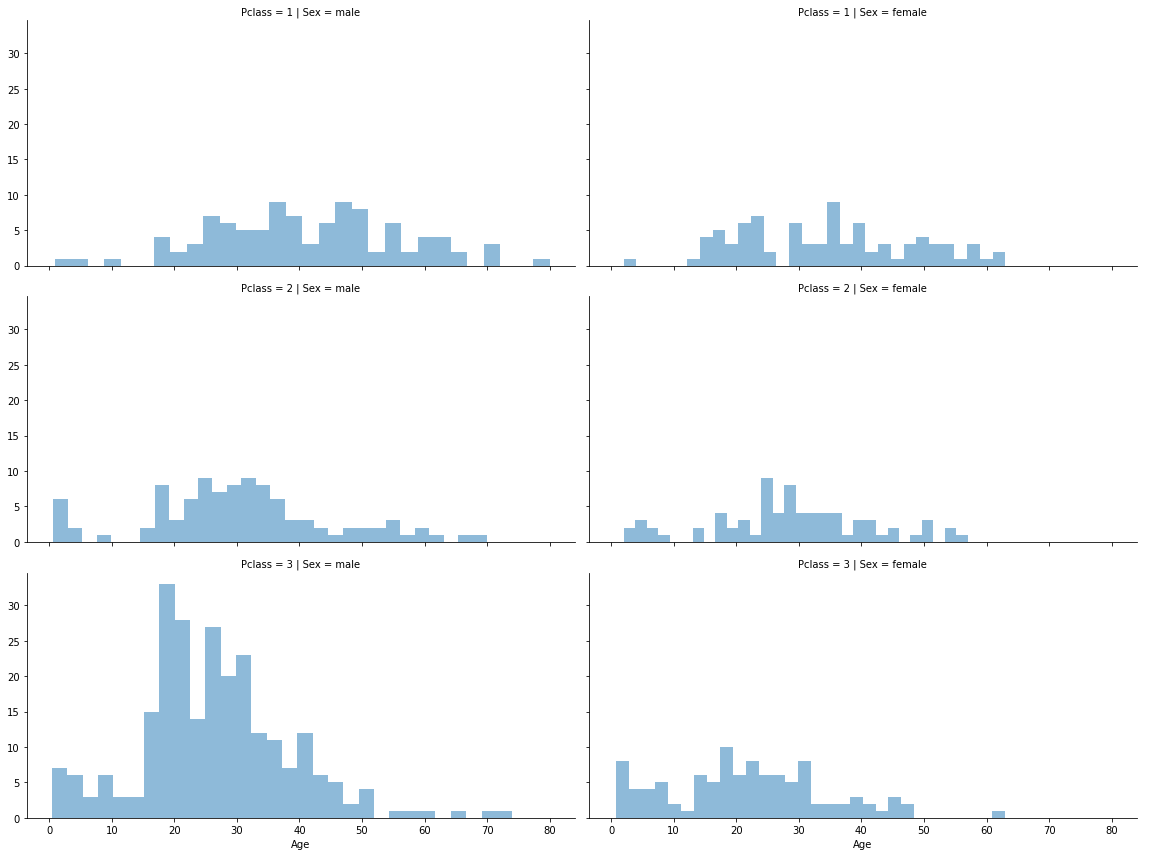

In [21]:
grid = sn.FacetGrid(train_data, row='Pclass', col='Sex', height=4, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=30)
grid.add_legend()

In [46]:
mean_age_train = train_data_x.groupby(["Sex", "Pclass"])["Age"].mean()
mean_age_train

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [47]:
mean_age_test = test_data_x.groupby(["Sex", "Pclass"])["Age"].mean()
mean_age_test

Sex  Pclass
0    1         41.333333
     2         24.376552
     3         23.073400
1    1         40.520000
     2         30.940678
     3         24.525104
Name: Age, dtype: float64

In [48]:
for i in range(0,2):
    for j in range(0,3):
        train_data_x.loc[ (train_data_x.Age.isna()) & (train_data_x.Sex == i) & (train_data_x.Pclass == j+1),\
                    'Age'] = list(mean_age_train[i])[j]
        
for i in range(0,2):
    for j in range(0,3):
        test_data_x.loc[ (test_data_x.Age.isna()) & (test_data_x.Sex == i) & (test_data_x.Pclass == j+1),\
                    'Age'] = list(mean_age_test[i])[j]


In [49]:
train_data_x.groupby(["Sex", "Pclass"])["Age"].mean() #Check if mean values changed

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [50]:
test_data_x.groupby(["Sex", "Pclass"])["Age"].mean() #Check if mean values changed

Sex  Pclass
0    1         41.333333
     2         24.376552
     3         23.073400
1    1         40.520000
     2         30.940678
     3         24.525104
Name: Age, dtype: float64

In [54]:
train_data_x.Embarked = train_data_x.Embarked.fillna('1') #Filling embarkment NA with most common value

In [55]:
test_data_x.Fare = test_data_x.Fare.fillna(test_data_x.Fare.mean()) #Filling fare NA with mean value

In [56]:
train_data_x.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [58]:
test_data_x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [59]:
#Data seems to be ready

# Data input editing

In [92]:
X_train = train_data_x.drop("Survived", axis=1)
Y_train = train_data_x["Survived"]
X_test  = test_data_x
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [93]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.03

In [94]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.35

In [95]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [96]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [98]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [99]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [101]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })

In [110]:
submission.to_csv('C:/Users/adm.mbgw/Desktop/Kaggle/Titanic/submission.csv', index=False)

In [106]:
Y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,